In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack, ndimage
import math
from tqdm.notebook import tqdm
import seaborn as sns
import galsim
import scipy.ndimage as ndi

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

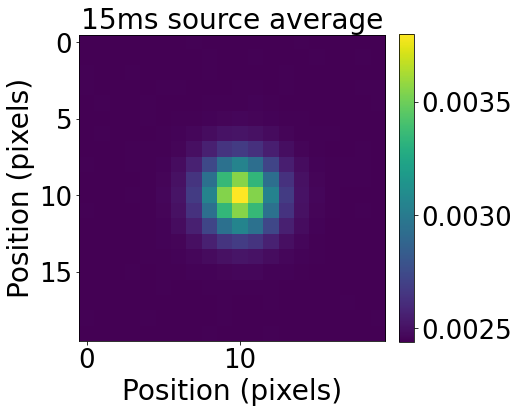

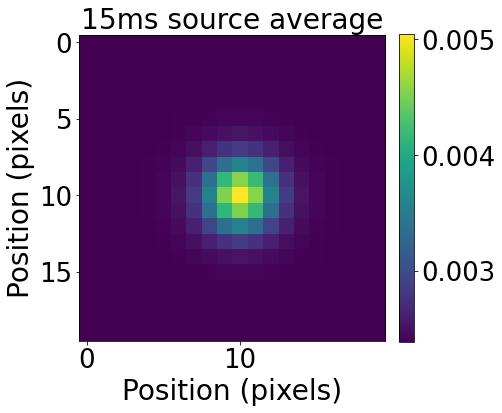

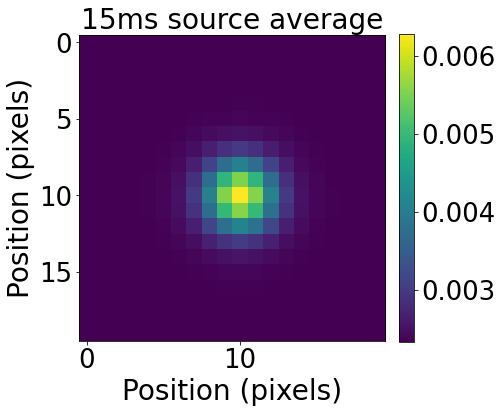

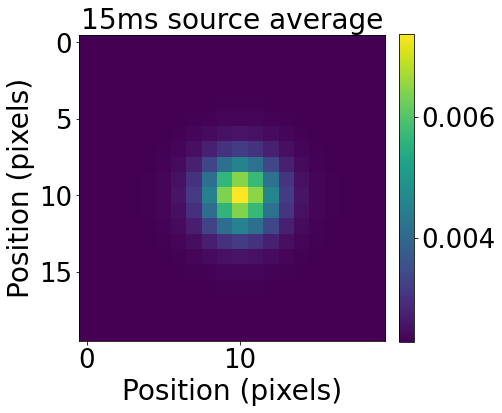

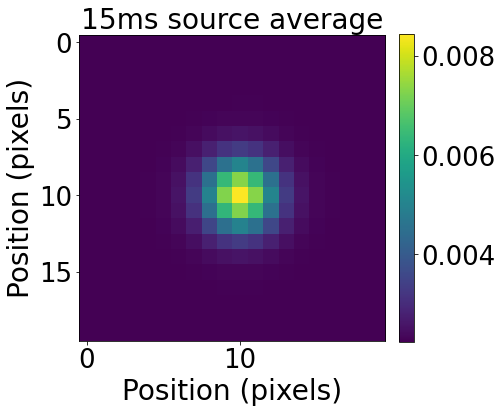

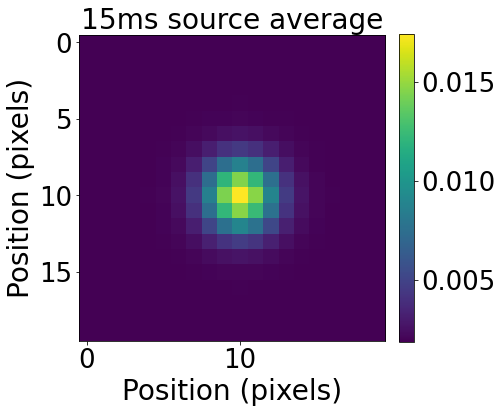

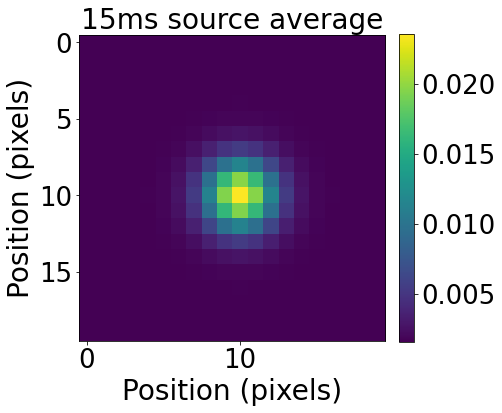

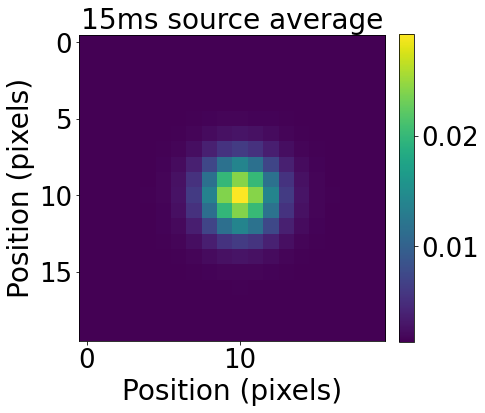

In [22]:
def mean_15s(num_simulations):
    
    for inten in [20000, 40000, 60000, 80000, 100000, 300000, 500000, 750000]:
        image_tot = np.zeros((20,20))

        for it in tqdm(range(num_simulations)):

            image = np.loadtxt(f'data/FRBs_noise_eff/FRB_FFT_15s_{inten}_{it}.txt')

            image[image < 0] = 0

            image += 1000
            image_array = np.random.normal(loc = image, scale = np.sqrt(image))

            image_array = image_array/sum(sum(image_array))
            image_tot += image_array

        image_tot = image_tot/num_simulations
        plt.figure(figsize = (6,6))
        plt.imshow(image_tot)
        plt.xlabel('Position (pixels)', fontsize = 28)
        plt.ylabel('Position (pixels)', fontsize = 28)
        plt.title(f'{duration} source average', fontsize = 28)
        plt.tick_params(labelsize = 26)
        cbar = plt.colorbar(fraction = 0.046, pad = 0.04)
        cbar.ax.tick_params(labelsize = 26)
        plt.imsave(f'data/FRBs_diff/FRB_FFT_15s_{inten}_mean.png', image_array)
        np.savetxt(f'data/FRBs_diff/FRB_FFT_15s_{inten}_mean.txt', image_array)


mean_15s(2000)


In [10]:
print(1e5)

100000.0


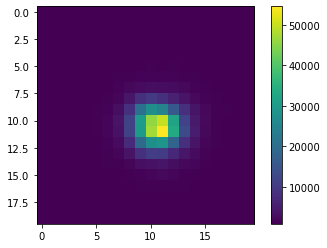

In [11]:
image_mean = np.loadtxt(f'data/FRBs_noise_eff/FRB_FFT_15ms_750000_1998.txt')

plt.imshow(image_mean)
plt.colorbar()

In [4]:
name = 'FRB'
method = 'FFT'

def add_c(name, method, duration, num_phot, num_simulations):
    for it in tqdm(range(num_simulations)):

        image = np.loadtxt('data/{}s_noise_eff/{}_{}_{}_{}_{}.txt'.format(name, name, method, duration, num_phot, it + 1))
        image_mean = np.loadtxt(f'data/FRBs_noise_eff/FRB_FFT_15s_{num_phot}_2000.txt')

        cmy, cmx = np.where(image == np.max(image))
        cy = cmy[0]
        cx = cmx[0]
        image = image[int(np.round(cy)) -  : int(np.round(cy)) + 4 + 1, int(np.round(cx)) - 4 : int(np.round(cx)) + 4 + 1]
        image_array = image/sum(sum(image))
        
        cmy, cmx = np.where(image_mean == np.max(image_mean))
        cy = cmy[0]
        cx = cmx[0]
        image_mean = image_mean[int(np.round(cy)) - 4 : int(np.round(cy)) + 4 + 1, int(np.round(cx)) - 4 : int(np.round(cx)) + 4 + 1]
        image_mean = image_mean/sum(sum(image_mean))
        
        #plt.figure()
        #plt.imshow(abs(image_array - image_mean))
        #plt.colorbar()
        plt.imsave('data/{}s_diff_cent/{}_{}_{}_{}_{}.png'.format(name, name, method, duration, num_phot, it), abs(image_array - image_mean))
        np.savetxt('data/{}s_diff_cent/{}_{}_{}_{}_{}.txt'.format(name, name, method, duration, num_phot, it), abs(image_array - image_mean))
        

durations = ['5ms', '10ms', '15ms', '20ms', '40ms', '60ms', '80ms', '100ms', '100ms', '120ms', '140ms', '150ms', '200ms']
num_phots = [20000, 40000, 60000, 80000, 100000, 300000, 500000, 750000]

durations = ['15s']
num_phots = [20000, 40000, 60000, 80000, 100000, 300000, 500000, 750000]


durations = ['5ms', '10ms', '15ms', '20ms', '40ms', '60ms', '80ms', '100ms', '120ms', '140ms', '150ms', '200ms', '15s']
num_phots = [20000, 40000, 60000, 80000, 100000, 300000, 500000, 750000]

for duration in tqdm(durations):
    for phots in tqdm(num_phots):
        add_c('FRB', 'FFT', duration, phots, 1998)    


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

In [6]:
name = 'FRB'
method = 'FFT'

def add_noise(name, method, duration, num_phot, num_simulations):
    for it in tqdm(range(num_simulations)):

        image = np.loadtxt('data/{}s_noise_eff/{}_{}_{}_{}_{}.txt'.format(name, name, method, duration, num_phot, it))

        cmy, cmx = np.where(image == np.max(image))
        cy = cmy[0]
        cx = cmx[0]
        image = image[int(np.round(cy)) - 8 : int(np.round(cy)) + 8 + 1, int(np.round(cx)) - 8 : int(np.round(cx)) + 8 + 1]
        image = np.clip(image, 0, 1e5)
        image_array = image/sum(sum(image))
    
        plt.imsave('data/{}s_brifat_noise_normalized_centered_notcropped/{}_{}_{}_{}_{}.png'.format(name, name, method, duration, num_phot, it), image_array)
        np.savetxt('data/{}s_brifat_noise_normalized_centered_notcropped/{}_{}_{}_{}_{}.txt'.format(name, name, method, duration, num_phot, it), image_array)



durations = ['15ms', '15s']
num_phots = [20000, 40000, 60000, 80000, 100000, 300000, 500000, 750000]
durations = ['5ms', '10ms', '20ms', '40ms', '60ms', '80ms', '100ms', '100ms', '120ms', '140ms', '150ms', '200ms']

durations = ['15ms', '15s']
num_phots = [300000]

for duration in tqdm(durations):
    for phots in tqdm(num_phots):
        add_noise('FRB', 'FFT', duration, phots, 4000)    


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

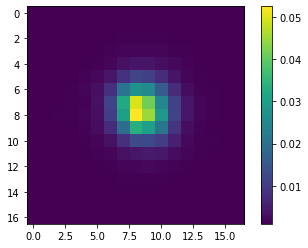

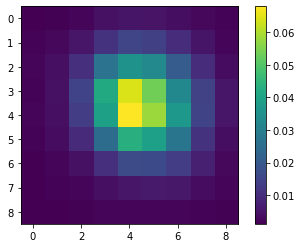

In [8]:

image_mean = np.loadtxt(f'data/FRBs_brifat_noise_normalized_centered_cropped8/FRB_FFT_15ms_750000_1258.txt')

plt.figure()
plt.imshow(image_mean)
plt.colorbar()

image_mean = np.loadtxt(f'data/FRBs_brifat_noise_normalized_centered_cropped/FRB_FFT_15ms_750000_1258.txt')
plt.figure()
plt.imshow(image_mean)
plt.colorbar()

In [22]:
import glob
import cv2
from PIL import Image
counts = glob.glob1('/home/guillemmh/ML/set_CRs15ms_75e5/CRs/CR_vertical', '*.png')



for it in tqdm(counts):

    image = cv2.imread(f'/home/guillemmh/ML/set_CRs15ms_75e5/CRs/CR_vertical/{it}',0)

    cy, cx = ndi.center_of_mass(image)
    image = image[int(np.round(cx)) - 6 : int(np.round(cx)) + 6, int(np.round(cy)) - 6 : int(np.round(cy)) + 6]
    image_array = image/sum(sum(image))

    plt.imsave(f'data/CRs_norm_eff/{it}', image_array)
    np.savetxt(f'data/CRs_norm_eff/{it}.txt', image_array)


  0%|          | 0/5682 [00:00<?, ?it/s]